![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [4]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

In [6]:
# Estadísticas descriptivas por estación
bikes.groupby('season')['total'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


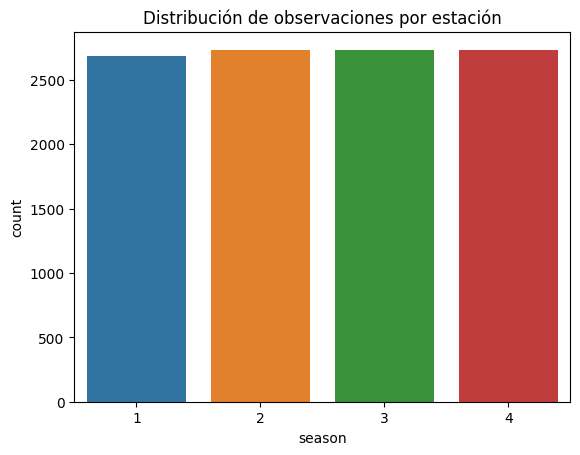

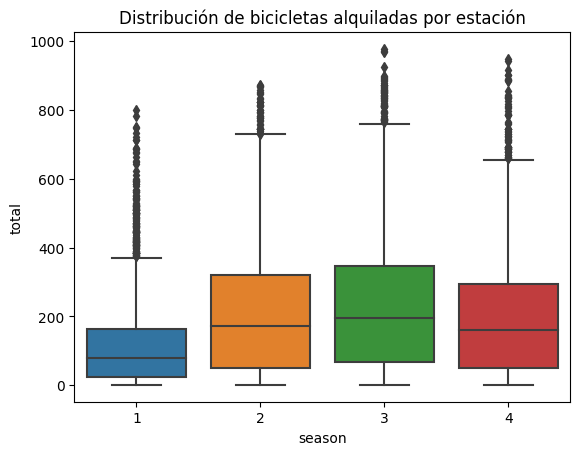

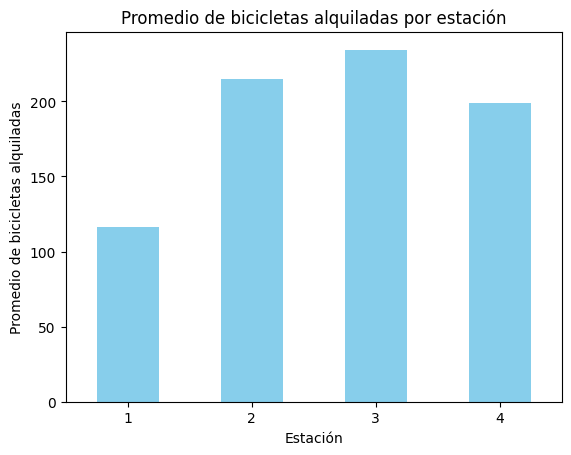

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de barras para contar la cantidad de observaciones por estación
sns.countplot(x='season', data=bikes)
plt.title('Distribución de observaciones por estación')
plt.show()

# Boxplot de bicicletas alquiladas por estación
sns.boxplot(x='season', y='total', data=bikes)
plt.title('Distribución de bicicletas alquiladas por estación')
plt.show()

# Gráfico de barras del promedio de bicicletas alquiladas por estación
season_avg = bikes.groupby('season')['total'].mean()
season_avg.plot(kind='bar', color='skyblue')
plt.title('Promedio de bicicletas alquiladas por estación')
plt.xlabel('Estación')
plt.ylabel('Promedio de bicicletas alquiladas')
plt.xticks(rotation=0)
plt.show()

#### Analisis de la variable season

* Conteo: Hay una cantidad similar de observaciones para las estaciones 2, 3 y 4 (Entre 2733 y 2734), mientras que la estación 1 tiene un poco menos (2686 observaciones).
* Media: La estación 3 tiene la media más alta de bicicletas alquiladas (con 234.42), seguida por la estación 2 y la estación 4. La estación 1 tiene la media más baja de bicicletas alquiladas (116.34)
* Desviación estandar: Las estaciones 2 y 3 tienen desviaciones relativamente altas, lo que sugiere una mayor variabilidad en los alquileres de bicicletas en estas estaciones. A diferencia de la estación 1 que tiene la variabilidad más baja.
* Minimo: El minimo valor de alquileres de bicicleta es 1 para todas las estaciones, es decir que no hubo un dia en que no se dejar de alquilar al menos una bicicleta.
* La estación 3 muestra la mayor demanda promedio de alquiler de bicicletas, una alta variabilidad. Por el contrario la estación 1 tiene la menor demanda y la menor variabilidad en los alquileres de bicicletas.
* Las estaciones 2 y 4 tiene demandas promedio intermedias y variabilidad moderada en los alquileres de bicicletas.ç

Estos resultados proporcionan información valiosa de como varia la demanda de alquiler de bicicletaas a lo largo de las estaciones y pueden ser utiles para la planificación y gestión del servicio. 

In [8]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

In [9]:
# Estadísticas descriptivas por estación
bikes.groupby('hour')['total'].describe()

,count,mean,std,min,25%,50%,75%,max
hour,,,,,,,,
0,455.0,55.138462,43.620012,2.0,24.00,41.0,74.50,283.0
1,454.0,33.859031,34.112105,1.0,11.00,19.0,46.00,168.0
2,448.0,22.899554,26.110267,1.0,5.00,11.0,32.00,119.0
3,433.0,11.757506,12.666442,1.0,3.00,6.0,15.00,66.0
4,442.0,6.407240,4.217633,1.0,3.00,6.0,9.00,28.0
5,452.0,19.767699,12.784293,1.0,8.00,19.0,29.00,57.0
6,455.0,76.259341,54.745333,1.0,24.50,75.0,118.00,213.0
7,455.0,213.116484,159.207044,1.0,63.00,208.0,334.00,596.0
8,455.0,362.769231,231.723065,8.0,133.50,392.0,563.50,839.0


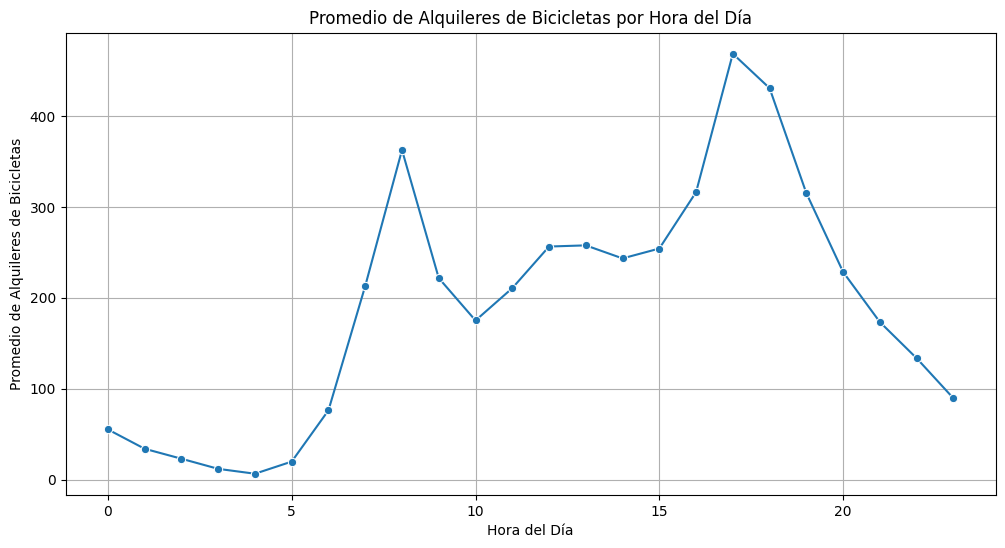

In [10]:
# Calcular el promedio de alquileres por hora
hourly_avg = bikes.groupby('hour')['total'].mean()

# Grafica del promedio de alquileres por hora
plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_avg.index, y=hourly_avg.values, marker='o')
plt.xlabel('Hora del Día')
plt.ylabel('Promedio de Alquileres de Bicicletas')
plt.title('Promedio de Alquileres de Bicicletas por Hora del Día')
plt.grid(True)
plt.show()

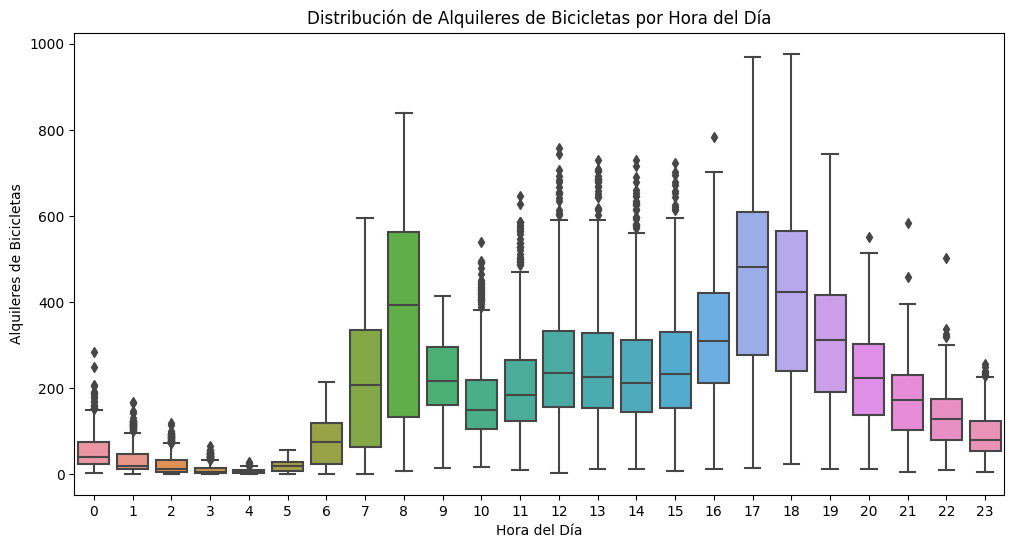

In [12]:
# Grafica boxplot de alquileres por hora
plt.figure(figsize=(12, 6))
sns.boxplot(x='hour', y='total', data=bikes)
plt.xlabel('Hora del Día')
plt.ylabel('Alquileres de Bicicletas')
plt.title('Distribución de Alquileres de Bicicletas por Hora del Día')
plt.show()

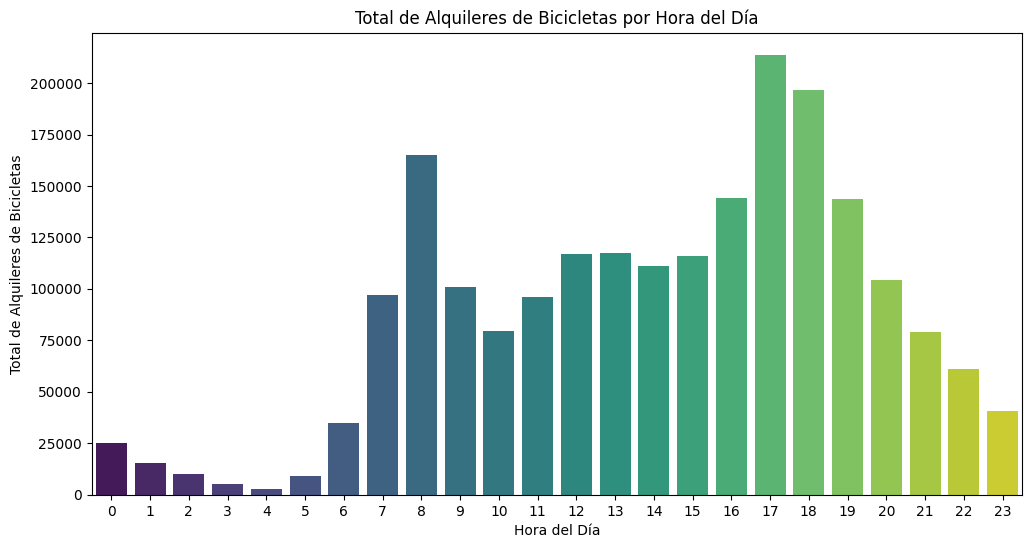

In [14]:
# Calcular la suma total de alquileres por hora
hourly_sum = bikes.groupby('hour')['total'].sum()

# Grafica suma total de alquileres por hora
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_sum.index, y=hourly_sum.values, palette='viridis')
plt.xlabel('Hora del Día')
plt.ylabel('Total de Alquileres de Bicicletas')
plt.title('Total de Alquileres de Bicicletas por Hora del Día')
plt.show()

#### Analisis de la variable hour

* Excepto por el rango de horas entre las 2 y 4 am, cada hora del dia tiene un conteo de observacijones consistente. 
* Las horas pico tienen las medias más altas de alquiler de bicicletas.Por el contrario las horas valle tienen las medias más bajas. 
* Las horas del día influyen significativamente en la cantidad de bicicletas alquiladas, con horas pico (por la mañana y por la tarde) mostrando una mayor demanda de alquiler de bicicletas: 
    Horas pico mañana: de 7am a 9am
    Horas pico tarde: de 5pm a 6pm. (Rango hora pico del día)
* Las horas de la madrugada y la noche tienen una menor demanda de alquiler de bicicletas, con promedios más bajos y menos variabilidad en los alquileres: 
    Horas valle diurnas: entre la 1 a.m. y las 5 a.m,
    Horas valle nocturna: 23 pm  
* La variabilidad en los alquileres de bicicletas es mayor durante las horas pico, indicando una mayor fluctuación en la demanda de alquileres durante esas horas.


### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<Axes: xlabel='hour'>

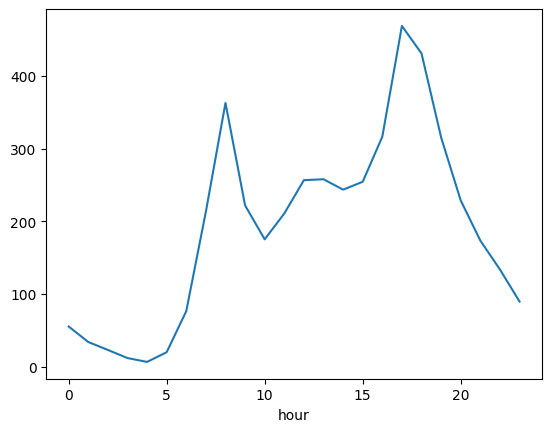

In [15]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

Este gráfico de línea muestra cómo varía el promedio de alquileres de bicicletas a lo largo del día, lo que resalta las horas pico y las horas de menor demanda.

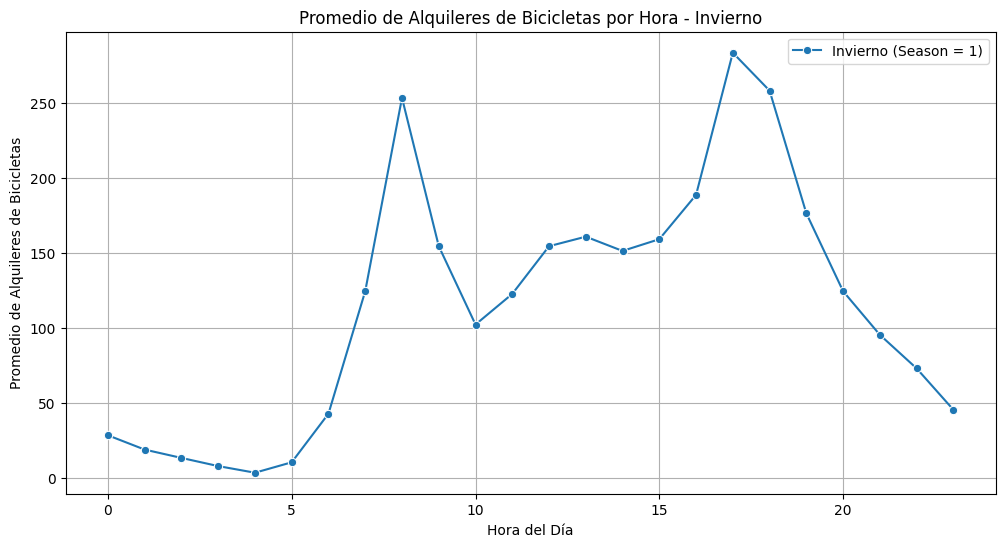

In [16]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 

# Filtrar datos para estaciones de invierno (season = 1)
winter_data = bikes[bikes['season'] == 1]

# Calcular el promedio de bicicletas rentadas por hora para invierno
winter_hourly_avg = winter_data.groupby('hour')['total'].mean()

# Crear la gráfica 
plt.figure(figsize=(12, 6))
sns.lineplot(x=winter_hourly_avg.index, y=winter_hourly_avg.values, label='Invierno (Season = 1)', marker='o')
plt.xlabel('Hora del Día')
plt.ylabel('Promedio de Alquileres de Bicicletas')
plt.title('Promedio de Alquileres de Bicicletas por Hora - Invierno')
plt.legend()
plt.grid(True)
plt.show()

#### Analisis de la variación en el alquiler de bicicletas para la estación 1 Invierno a lo largo del dia

* El número de observaciones (count) varía para cada hora del día, con un mínimo de 96 observaciones a las 3:00 AM y un máximo de 114 observaciones en varias horas del día. Esto indica que no hay datos faltantes para estas horas.
* El promedio de alquileres de bicicletas por hora varía considerablemente a lo largo del día, desde aproximadamente 3 bicicletas a las 4:00 AM hasta más de 283 bicicletas a las 5:00 PM.
* Las horas con los promedios más altos de alquileres suelen ser las horas pico durante el día laboral (por ejemplo, entre las 7:00 AM y las 8:00 AM, y entre las 4:00 PM y las 6:00 PM).
* Las horas con altos promedios de alquileres (mean) generalmente también tienen desviaciones estándar más altas, lo que sugiere una variabilidad considerable en la demanda de bicicletas durante esas horas.

Para esta estación se tienen los siguientes hallazgos: 

* Las horas de mayor demanda de alquileres de bicicletas se encuentran típicamente en las primeras horas de la mañana (entre las 7:00 AM y las 9:00 AM) y en las últimas horas de la tarde (entre las 4:00 PM y las 6:00 PM).
* Variabilidad horaria: Existe una variabilidad significativa en la cantidad de alquileres de bicicletas por hora, lo que indica diferentes patrones de uso a lo largo del día.
* La estacionalidad y los patrones diarios en los alquileres de bicicletas pueden influir en las estrategias en la planificación de recursos para satisfacer la demanda.
* Las horas de menor demanda suelen ser durante la madrugada y las primeras horas de la tarde.

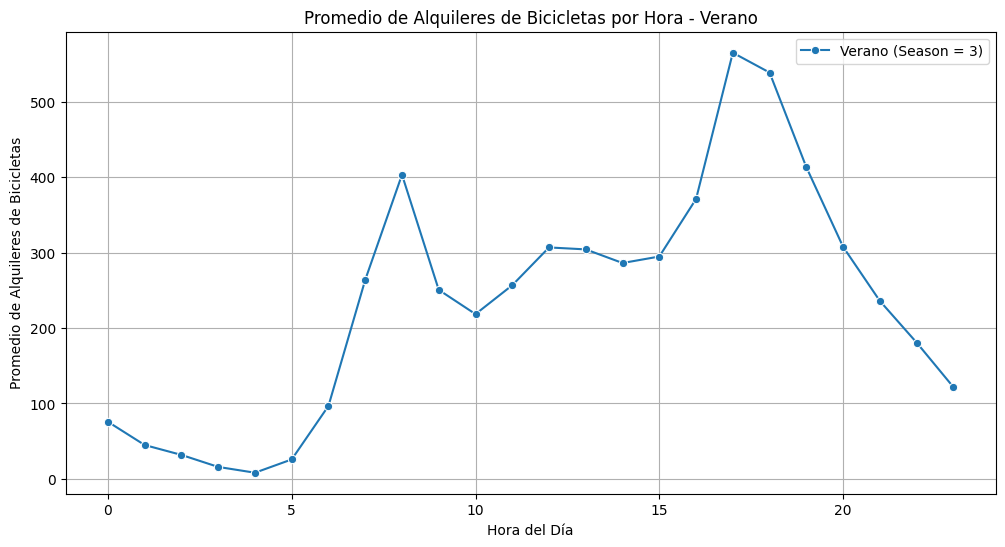

In [17]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
# Filtrar datos para estaciones de verano (season = 3)
summer_data = bikes[bikes['season'] == 3]

# Calcular el promedio de bicicletas rentadas por hora para verano
summer_hourly_avg = summer_data.groupby('hour')['total'].mean()

# Crear la gráfica 
plt.figure(figsize=(12, 6))
sns.lineplot(x=summer_hourly_avg.index, y=summer_hourly_avg.values, label='Verano (Season = 3)', marker='o')
plt.xlabel('Hora del Día')
plt.ylabel('Promedio de Alquileres de Bicicletas')
plt.title('Promedio de Alquileres de Bicicletas por Hora - Verano')
plt.legend()
plt.grid(True)
plt.show()

#### Analisis de la variación en el alquiler de bicicletas para la estación 3 Verano a lo largo del dia

* El número de observaciones (count) es consistente en cadahora del dia, en general varian entre 113 y 114 observaciones. 
* El promedio de alquileres de bicicletas por hora varía considerablemente a lo largo del día, desde aproximadamente 8 bicicletas a las 4:00 AM hasta más de 565 bicicletas a las 5:00 PM.
* Las horas pico con los promedios más altos de alquileres suelen ser durante las horas de trabajo y después del trabajo (entre las 7:00 AM y las 8:00 AM, y entre las 4:00 PM y las 6:00 PM).  
* Las horas con altos promedios de alquileres (mean) generalmente también tienen desviaciones estándar más altas, lo que sugiere una variabilidad considerable en la demanda de bicicletas durante esas horas. En esto también coincide con la estación 1 Invierno. 

Para esta estación se tienen hallazgos similares a los encontrados en la estación 1 Invierno: 

* Las horas de mayor demanda de alquileres de bicicletas se encuentran típicamente en las primeras horas de la mañana (entre las 7:00 AM y las 8:00 AM) y en las últimas horas de la tarde (entre las 4:00 PM y las 6:00 PM).
* Variabilidad horaria: Existe una variabilidad significativa en la cantidad de alquileres de bicicletas por hora, lo que indica diferentes patrones de uso a lo largo del día.
* La estacionalidad y los patrones diarios en los alquileres de bicicletas pueden influir ena gestión de recursos y la planificación de servicios de alquiler de bicicletas durante diferentes horas del día.
* Las horas de menor demanda suelen ser durante la madrugada y las primeras horas de la tarde.

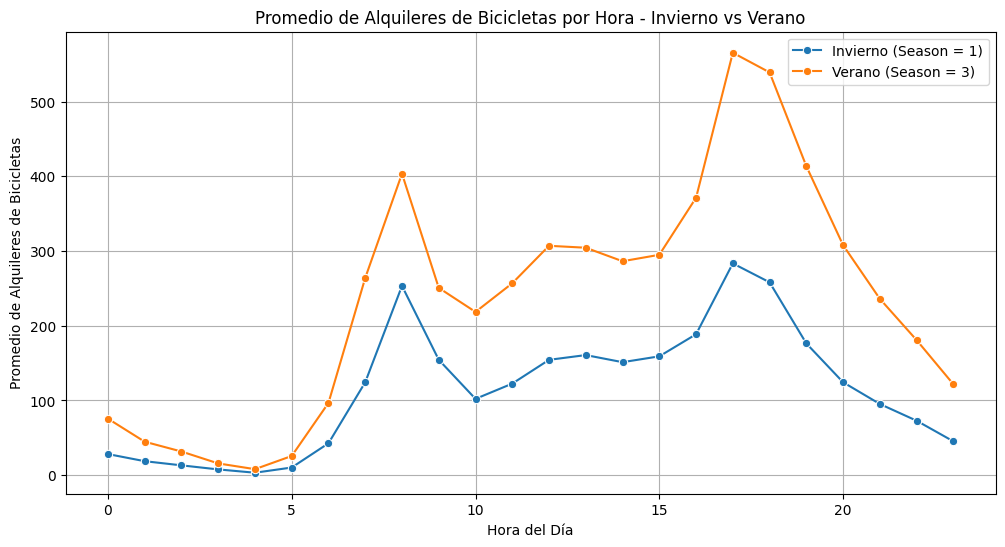

In [18]:
# Crear la gráfica comparativa
plt.figure(figsize=(12, 6))
sns.lineplot(x=winter_hourly_avg.index, y=winter_hourly_avg.values, label='Invierno (Season = 1)', marker='o')
sns.lineplot(x=summer_hourly_avg.index, y=summer_hourly_avg.values, label='Verano (Season = 3)', marker='o')
plt.xlabel('Hora del Día')
plt.ylabel('Promedio de Alquileres de Bicicletas')
plt.title('Promedio de Alquileres de Bicicletas por Hora - Invierno vs Verano')
plt.legend()
plt.grid(True)
plt.show()

* Tanto la estación 1 como la estación 3 experimentan patrones de demanda similares a lo largo del día, con horas pico durante las horas de trabajo y después del trabajo.
* Ambas estaciones muestran una variabilidad considerable en la demanda de bicicletas por hora, lo que sugiere que la gestión de recursos y la planificación deben tener en cuenta esta variabilidad para satisfacer la demanda de manera efectiva.
* La demanda de alquiler de bicicletas es mayor en la estación 3 que en la estación 1. 

En resumen, aunque hay similitudes en los patrones de demanda entre la estación 1 y la estación 3, existen diferencias específicas en los promedios y la variabilidad que podrían influir en las estrategias de gestión y planificación para cada estación.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [19]:
# Celda 3
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Definir variables predictoras y variable de respuesta
X = bikes[['season', 'hour']]
y = bikes['total']

# Preprocesamiento de variables categóricas
column_transformer = ColumnTransformer(
    [('encoder', OneHotEncoder(drop='first'), ['season'])],
    remainder='passthrough'
)

# Definir el modelo de regresión lineal
model = Pipeline([
    ('preprocessor', column_transformer),
    ('regressor', LinearRegression())
])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el modelo
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio en el conjunto de prueba: {mse}")

# Obtener coeficientes
coefficients = model.named_steps['regressor'].coef_
intercept = model.named_steps['regressor'].intercept_

# Obtener nombres de las características después de la codificación
feature_names = model.named_steps['preprocessor'].named_transformers_['encoder'].get_feature_names_out(input_features=['season'])

# Imprimir coeficientes e interpretación
print("Coeficientes:")
for feature_name, coef in zip(feature_names, coefficients):
    print(f"{feature_name}: {coef}")

print(f"Intercepto: {intercept}")

Error cuadrático medio en el conjunto de prueba: 25409.92049897062
Coeficientes:
season_2: 99.1066707157126
season_3: 116.04633999792318
season_4: 84.94480199563802
Intercepto: -5.919547341959145


#### Interpretación de Coeficientes:

La una variable categórica season cuenta con cuatro categorías: 1, 2, 3 y 4 (correspondientes a las cuatro estaciones del año). Después de aplicar el OneHotEncoder se transforma la variable season en tres nuevas características binarias: season_2, season_3 y season_4. season_1 se omite porque se considera la categoría de referencia. Entonces, si una observación pertenece a la temporada 1, todas las características season_2, season_3 y season_4 serán 0.

* Coeficiente de season_2: es aproximadamente 99.11. Esto indica que, en comparación con la temporada 1 (que se toma como referencia), se espera que la temporada 2 aumente el número promedio de bicicletas rentadas (counts) en 99.11 unidades, manteniendo todas las demás variables constantes.
* Coeficiente de season_3:es aproximadamente 116.05.Indica que la temporada 3 aumenta el número promedio de bicicletas rentadas en 116.05 unidades en comparación con la temporada 1.
* Coeficiente de season_4:es aproximadamente 84.94.Esto implica que la temporada 4 aumenta el número promedio de bicicletas rentadas en 84.94 unidades en comparación con la temporada 1.
* Intercepto: también conocido como sesgo o constante es aproximadamente -5.92. Representa el valor esperado de counts cuando todas las demás variables predictoras (en este caso, las temporadas) son cero. En el contexto del modelo, este valor no tiene una interpretación directa significativa, porque no tiene sentido práctico que todas las temporadas sean cero.

Según los coeficientes del modelo:

* Las temporadas 2 y 3 tienen un efecto positivo significativo en el número de bicicletas rentadas, con la temporada 3 teniendo el mayor efecto.
* La temporada 4 también tiene un impacto positivo, pero menor en comparación con las temporadas 2 y 3.
* El intercepto negativo puede no tener una interpretación directa en este contexto debido a la naturaleza de las variables predictoras.

*Limitaciones del modelo:*

En el contexto del modelo de regresión lineal para predecir el número de bicicletas rentadas (total) en función de las variables season (temporada) y hour (hora), se tienen algunas limitaciones:

* El error cuadrático medio en el conjunto de prueba es 25409.92. Es un MSE alto indicando que el modelo puede no estar capturando completamente la variabilidad en los datos o que podría estar sobreajustando.
* La regresión lineal asume una relación lineal entre las variables predictoras y la variable de respuesta (total). Sin embargo, las relaciones reales pueden ser más complejas y no lineales. Por ejemplo, la relación entre la hora del día y el número de bicicletas rentadas puede no ser estrictamente lineal en todas las circunstancias.
* La regresión lineal requiere que los errores del modelo sean independientes entre sí. En el caso de datos de series temporales como el alquiler de bicicletas, es posible que existan correlaciones temporales en los errores, lo cual no cumple con esta suposición.
* Es necesario evaluar si hay multicolinealidad entre las variables predictoras, esto podria afectar la precisión y estabilidad de los coeficientes estimados en la regresión lineal.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [20]:
# Celda 4

# Definir una función para predecir el total basado en hour y season
def predict_total(hour, season):
    if season == 1:
        if hour < 8:
            return "Bajo"  # Predicción de bajo número de bicicletas
        elif hour < 16:
            if hour < 12:
                return "Moderado - Mañana"  # Predicción de moderado número de bicicletas por la mañana
            else:
                return "Moderado - Tarde"  # Predicción de moderado número de bicicletas por la tarde
        else:
            return "Alto"  # Predicción de alto número de bicicletas
    elif season == 2:
        if hour < 6:
            return "Bajo"  # Predicción de bajo número de bicicletas
        elif hour < 12:
            if hour < 8:
                return "Moderado - Mañana"  # Predicción de moderado número de bicicletas por la mañana
            else:
                return "Moderado - Tarde"  # Predicción de moderado número de bicicletas al mediodía
        else:
            return "Alto"  # Predicción de alto número de bicicletas
    elif season == 3:
        if hour < 4:
            return "Bajo"  # Predicción de bajo número de bicicletas
        elif hour < 8:
            if hour < 6:
                return "Moderado - Mañana Temprano"  # Predicción de moderado número de bicicletas por la mañana temprano
            else:
                return "Moderado - Mañana Tarde"  # Predicción de moderado número de bicicletas por la mañana tardía
        elif hour < 16:
            return "Alto"  # Predicción de alto número de bicicletas
        else:
            return "Muy Alto"  # Predicción de muy alto número de bicicletas
    elif season == 4:
        if hour < 8:
            return "Bajo"  # Predicción de bajo número de bicicletas
        elif hour < 14:
            if hour < 10:
                return "Moderado - Mañana"  # Predicción de moderado número de bicicletas por la mañana
            else:
                return "Moderado - Mediodía"  # Predicción de moderado número de bicicletas al mediodía
        else:
            return "Alto"  # Predicción de alto número de bicicletas

# Crear una nueva columna en el dataframe con las predicciones
bikes['predicted_total'] = bikes.apply(lambda row: predict_total(row['hour'], row['season']), axis=1)

# Verificar las predicciones y contar el número de nodos finales
num_final_nodes = bikes['predicted_total'].nunique()
print("Número de nodos finales:", num_final_nodes)

# Calcular el número de observaciones por categoría en 'predicted_total'
prediction_counts = bikes['predicted_total'].value_counts()

# Calcular el total de observaciones clasificadas
total_classified_observations = prediction_counts.sum()

#print(bikes[['hour', 'season', 'total', 'predicted_total']].head(10))

# Imprimir un resumen de las predicciones por categoría y el total de observaciones clasificadas
print("Resumen de predicciones por categoría (predicted_total):")
print(prediction_counts)
print(f"\nTotal de observaciones clasificadas: {total_classified_observations}")

Número de nodos finales: 8
Resumen de predicciones por categoría (predicted_total):
predicted_total
Alto                          4332
Bajo                          2910
Moderado - Tarde               912
Muy Alto                       912
Moderado - Mañana              908
Moderado - Mediodía            456
Moderado - Mañana Temprano     228
Moderado - Mañana Tarde        228
Name: count, dtype: int64

Total de observaciones clasificadas: 10886


### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [23]:
# Celda 5

from sklearn.metrics import mean_squared_error, r2_score

# Dividir los datos en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el árbol de decisiones
# Puedes ajustar los hiperparámetros según lo consideres necesario
tree_regressor = DecisionTreeRegressor(max_depth=5, min_samples_split=10, random_state=42)
tree_regressor.fit(X_train, y_train)

# Predecir en el conjunto de validación
y_pred = tree_regressor.predict(X_val)

# Calcular métricas de desempeño
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

# Imprimir métricas de desempeño
print(f"Error Cuadrático Medio (MSE) en conjunto de validación: {mse:.2f}")
print(f"Coeficiente de Determinación (R^2) en conjunto de validación: {r2:.2f}")

Error Cuadrático Medio (MSE) en conjunto de validación: 14954.91
Coeficiente de Determinación (R^2) en conjunto de validación: 0.55


Error cuadrático medio (MSE) del modelo de regresión lineal: 25409.92049897062
Error cuadrático medio (MSE) del modelo de árbol de decisiones: 14954.91

*Interpretación del MSE:*

* Regresión Lineal: El MSE de 25409.92 indica que, en promedio, las predicciones del modelo de regresión lineal están alejadas en aproximadamente 25409.92 unidades al cuadrado de las verdaderas etiquetas de destino en el conjunto de prueba. Este valor es relativamente alto y sugiere que el modelo de regresión lineal puede no estar capturando bien la relación no lineal entre las variables predictoras y la variable de respuesta.
* Árbol de Decisiones: El MSE de 14954.91 del árbol de decisiones es significativamente menor que el de la regresión lineal. Esto indica que el modelo de árbol de decisiones ha logrado reducir el error de predicción en comparación con la regresión lineal en este conjunto de datos. El árbol de decisiones parece estar capturando mejor la complejidad de los datos y puede adaptarse más efectivamente a las relaciones no lineales entre las variables predictoras y la variable objetivo.

*Comparación y Análisis:* 

* Desempeño Relativo: El árbol de decisiones supera significativamente al modelo de regresión lineal en términos de rendimiento, según el MSE. Esto sugiere que el árbol de decisiones es una mejor opción para este problema de predicción de bicicletas compartidas en función de las variables "season" y "hour". La capacidad del árbol de decisiones para capturar relaciones no lineales y segmentar el espacio de características en regiones más precisas puede ser la razón principal detrás de su mejor desempeño.

En resumen, el árbol de decisiones muestra un mejor desempeño que la regresión lineal en este caso particular, con un MSE significativamente más bajo en el conjunto de prueba. 

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [24]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [25]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [26]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [27]:
# Celda 6

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV

# Preprocesamiento: Escalar variables numéricas en X
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

# Árbol de Decisión - Calibración de parámetros y evaluación
# Definir el modelo de árbol de decisión
tree_model = DecisionTreeClassifier(random_state=1)

# Definir los parámetros a ajustar usando GridSearchCV
param_grid_tree = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Configurar GridSearchCV para encontrar los mejores parámetros
tree_grid = GridSearchCV(tree_model, param_grid_tree, cv=5, scoring='accuracy')
tree_grid.fit(X_train, y_train)

# Mejores parámetros encontrados
print("Mejores parámetros para árbol de decisión:", tree_grid.best_params_)

# Evaluar el modelo con los mejores parámetros en el conjunto de prueba
y_pred_tree = tree_grid.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
f1_score_tree = f1_score(y_test, y_pred_tree)

print("Accuracy del árbol de decisión:", accuracy_tree)
print("F1-Score del árbol de decisión:", f1_score_tree)

Mejores parámetros para árbol de decisión: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy del árbol de decisión: 0.6373333333333333
F1-Score del árbol de decisión: 0.6616915422885573


In [28]:
# Regresión Logística - Sin calibración de parámetros (uso directo)

from sklearn.linear_model import LogisticRegression
# Definir el modelo de regresión logística
logreg_model = LogisticRegression(random_state=1)

# Entrenar el modelo de regresión logística
logreg_model.fit(X_train, y_train)

# Evaluar el modelo de regresión logística en el conjunto de prueba
y_pred_logreg = logreg_model.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
f1_score_logreg = f1_score(y_test, y_pred_logreg)

print("Accuracy de la regresión logística:", accuracy_logreg)
print("F1-Score de la regresión logística:", f1_score_logreg)

Accuracy de la regresión logística: 0.64
F1-Score de la regresión logística: 0.6296296296296297


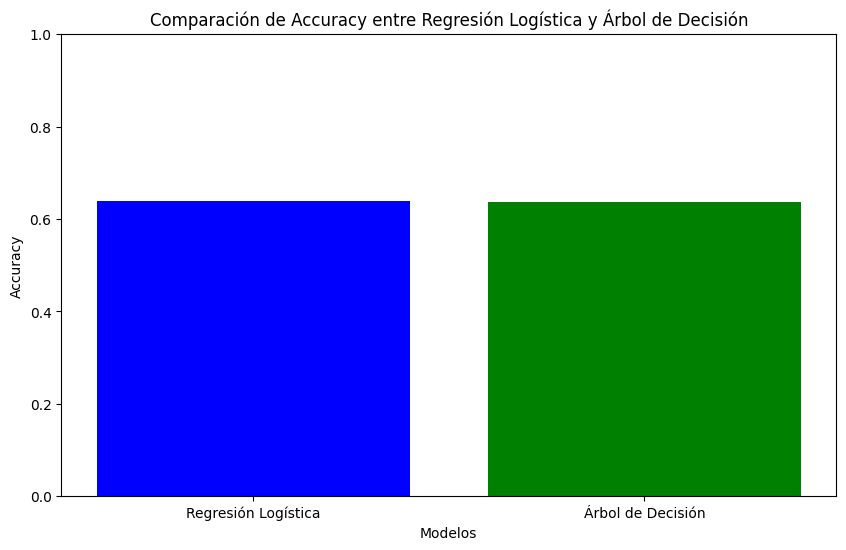

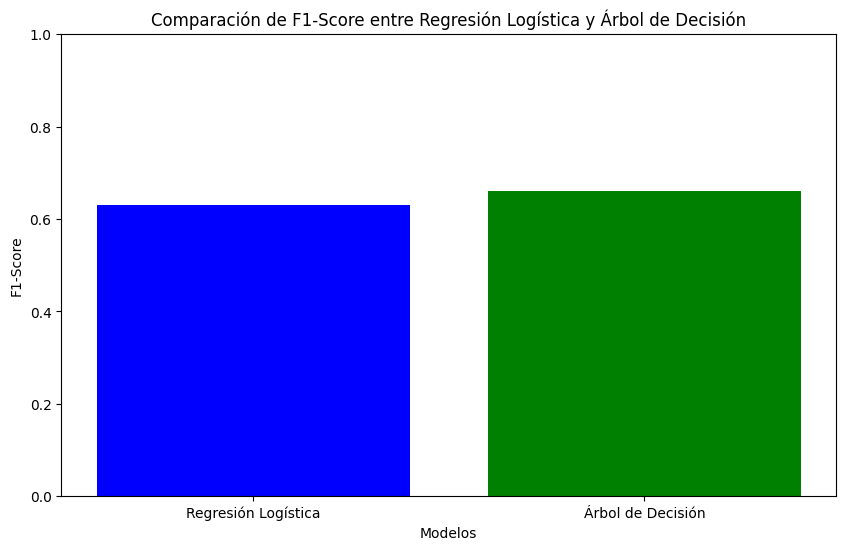

In [29]:
# Métricas a comparar
models = ['Regresión Logística', 'Árbol de Decisión']
accuracy_scores = [accuracy_logreg, accuracy_tree]
f1_scores = [f1_score_logreg, f1_score_tree]

# Crear gráfico de barras para comparar accuracy
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color=['blue', 'green'])
plt.title('Comparación de Accuracy entre Regresión Logística y Árbol de Decisión')
plt.xlabel('Modelos')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

# Crear gráfico de barras para comparar F1-score
plt.figure(figsize=(10, 6))
plt.bar(models, f1_scores, color=['blue', 'green'])
plt.title('Comparación de F1-Score entre Regresión Logística y Árbol de Decisión')
plt.xlabel('Modelos')
plt.ylabel('F1-Score')
plt.ylim(0, 1)
plt.show()

Comparación y Evaluación:

* Ambos modelos tienen un desempeño similar en términos de accuracy, con la regresión logística ligeramente por encima del árbol de decisión.
* En cuanto al F1-Score, el árbol de decisión tiene un F1-Score ligeramente mejor que la regresión logística.

En general, ambos modelos muestran un desempeño decente en la clasificación de noticias como populares o no populares, pero se puede realizar una evaluación más detallada considerando otros aspectos y ajustando los parámetros si es necesario para mejorar el desempeño.

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged donde:

-las primeras 100 muestras vienen de árboles de decisión donde max_depth tome un valor de su elección\
-las segundas 100 muestras vienen de árboles de decisión donde min_samples_leaf tome un valor de su elección\
-las últimas 100 muestras vienen de regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

Nota: 

Para este ensamble de 300 modelos, deben hacer votación mayoritaria. Esto lo pueden hacer de distintas maneras. La más "fácil" es haciendo la votación "manualmente", como se hace a partir del minuto 5:45 del video de Ejemplo práctico de emsablajes en Coursera. Digo que es la más fácil porque si hacen la votación mayoritaria sobre las 300 predicciones van a obtener lo que se espera.

Otra opción es: para cada uno de los 3 tipos de modelos, entrenar un ensamble de 100 modelos cada uno. Predecir para cada uno de esos tres ensambles y luego predecir como un ensamble de los 3 ensambles. La cuestión es que la votación mayoritaria al usar los 3 ensambles no necesariamente va a generar el mismo resultado que si hacen la votación mayoritaria directamente sobre los 300 modelos. Entonces, para los que quieran hacer esto, deben hacer ese último cálculo con cuidado.

Para los que quieran hacerlo como ensamble de ensambles, digo que se debe hacer el ensamble final con cuidado por lo siguiente. Supongamos que:

* para los 100 árboles del primer tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para los 100 árboles del segundo tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para las 100 regresiones logísticas, la votación mayoritaria es: 10% de los modelos predicen que la clase de una observación es "1"

Si se hace la votación mayoritaria de los 300 modelos, la predicción de esa observación debería ser: (100*55%+100*55%+100*10%)/300 = 40% de los modelos votan porque la predicción debería ser "1". Es decir, la predicción del ensamble es "0" (dado que menos del 50% de modelos predijo un 1).

Sin embargo, si miramos cada ensamble por separado, el primer ensamble predice "1", el segundo ensamble predice "1" y el último ensamble predice "0". Si hago votación mayoritaria sobre esto, la predicción va a ser "1", lo cual es distinto a si se hace la votación mayoritaria sobre los 300 modelos.

In [30]:
# Celda 7
from sklearn.ensemble import BaggingClassifier

# Primer Conjunto (Árboles de Decisión con max_depth Especificado)
# Configuración de parámetros
max_depth_value = 5  # Valor de max_depth

# Crear y entrenar el ensamble de árboles de decisión
bagged_trees_1 = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=max_depth_value),
    n_estimators=100,
    random_state=1
)
bagged_trees_1.fit(X_train, y_train)

# Evaluar el desempeño del ensamble
y_pred_trees_1 = bagged_trees_1.predict(X_test)
accuracy_trees_1 = accuracy_score(y_test, y_pred_trees_1)
f1_trees_1 = f1_score(y_test, y_pred_trees_1)
print("Desempeño del conjunto 1 (Árboles, max_depth={}):".format(max_depth_value))
print("Accuracy:", accuracy_trees_1)
print("F1-Score:", f1_trees_1)

Desempeño del conjunto 1 (Árboles, max_depth=5):
Accuracy: 0.66
F1-Score: 0.6604527296937417


In [31]:
# Segundo Conjunto (Árboles de Decisión con min_samples_leaf Especificado)
min_samples_leaf_value = 5  # Valor de min_samples_leaf 

# Crear y entrenar el ensamble de árboles de decisión
bagged_trees_2 = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(min_samples_leaf=min_samples_leaf_value),
    n_estimators=100,
    random_state=1
)
bagged_trees_2.fit(X_train, y_train)

# Evaluar el desempeño del ensamble
y_pred_trees_2 = bagged_trees_2.predict(X_test)
accuracy_trees_2 = accuracy_score(y_test, y_pred_trees_2)
f1_trees_2 = f1_score(y_test, y_pred_trees_2)
print("\nDesempeño del conjunto 2 (Árboles, min_samples_leaf={}):".format(min_samples_leaf_value))
print("Accuracy:", accuracy_trees_2)
print("F1-Score:", f1_trees_2)


Desempeño del conjunto 2 (Árboles, min_samples_leaf=5):
Accuracy: 0.6533333333333333
F1-Score: 0.6547144754316069


In [32]:
# Tercer Conjunto (Regresiones Logísticas)
# Crear y entrenar el ensamble de regresiones logísticas
bagged_logistic = BaggingClassifier(
    base_estimator=LogisticRegression(),
    n_estimators=100,
    random_state=1
)
bagged_logistic.fit(X_train, y_train)

# Evaluar el desempeño del ensamble
y_pred_logistic = bagged_logistic.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)
print("\nDesempeño del conjunto 3 (Regresiones Logísticas):")
print("Accuracy:", accuracy_logistic)
print("F1-Score:", f1_logistic)


Desempeño del conjunto 3 (Regresiones Logísticas):
Accuracy: 0.6413333333333333
F1-Score: 0.6310013717421126


In [33]:
# Obtener predicciones de los tres conjuntos
y_pred_trees_1 = bagged_trees_1.predict(X_test)
y_pred_trees_2 = bagged_trees_2.predict(X_test)
y_pred_logistic = bagged_logistic.predict(X_test)

# Realizar votación mayoritaria
y_ensemble = np.mean([y_pred_trees_1, y_pred_trees_2, y_pred_logistic], axis=0) > 0.5
y_ensemble = y_ensemble.astype(int)

# Evaluar el desempeño del ensamble final
accuracy_ensemble = accuracy_score(y_test, y_ensemble)
f1_ensemble = f1_score(y_test, y_ensemble)
print("\nDesempeño del ensamble (Votación Mayoritaria):")
print("Accuracy:", accuracy_ensemble)
print("F1-Score:", f1_ensemble)


Desempeño del ensamble (Votación Mayoritaria):
Accuracy: 0.656
F1-Score: 0.6550802139037434


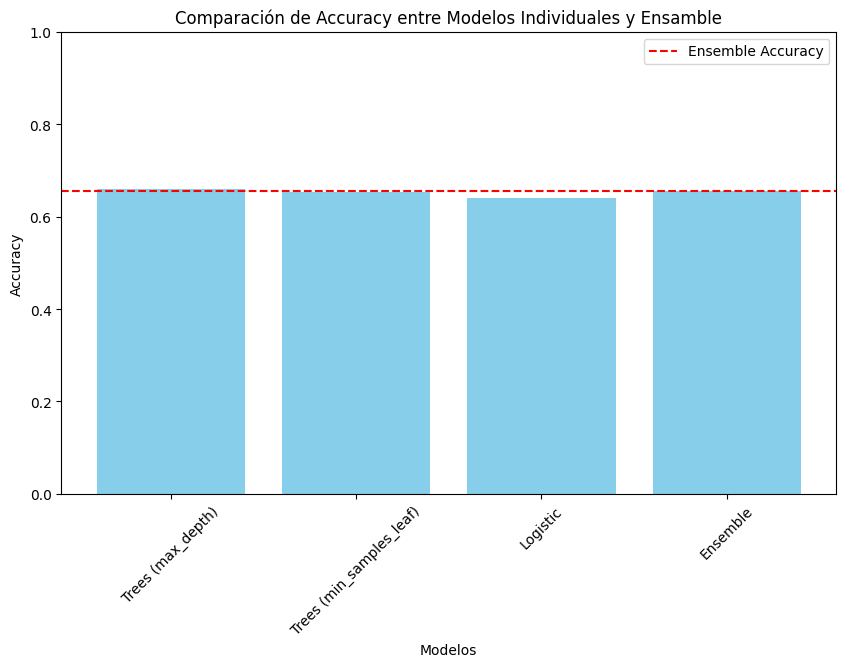

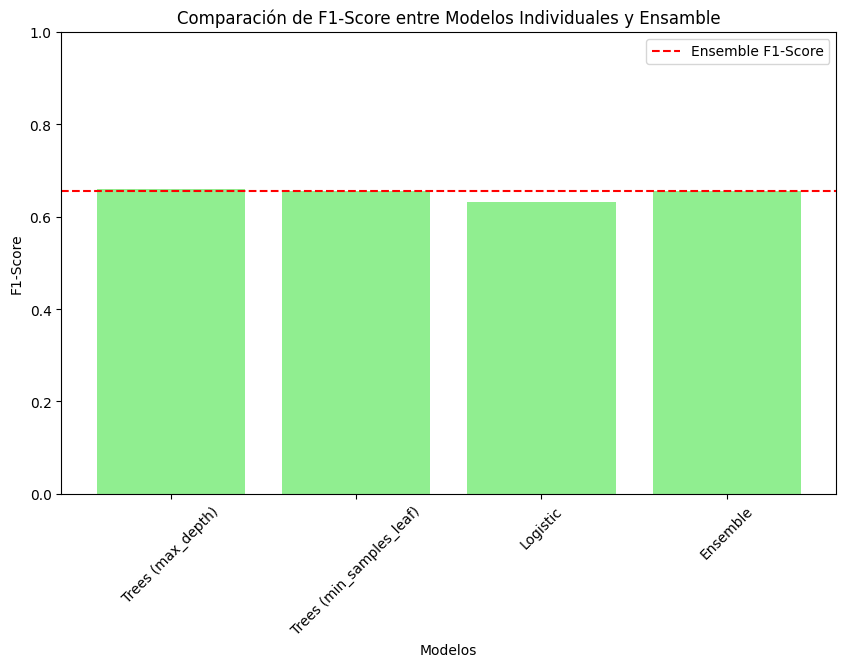

In [34]:
# Valores de Accuracy y F1-Score de los modelos individuales y el ensamble final
accuracies = [accuracy_trees_1, accuracy_trees_2, accuracy_logistic, accuracy_ensemble]
f1_scores = [f1_trees_1, f1_trees_2, f1_logistic, f1_ensemble]
models = ['Trees (max_depth)', 'Trees (min_samples_leaf)', 'Logistic', 'Ensemble']

# Gráfico de barras para Accuracy
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Modelos')
plt.ylabel('Accuracy')
plt.title('Comparación de Accuracy entre Modelos Individuales y Ensamble')
plt.ylim(0, 1)  # Establecer límites en el eje y
plt.axhline(y=accuracy_ensemble, color='red', linestyle='--', label='Ensemble Accuracy')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Gráfico de barras para F1-Score
plt.figure(figsize=(10, 6))
plt.bar(models, f1_scores, color='lightgreen')
plt.xlabel('Modelos')
plt.ylabel('F1-Score')
plt.title('Comparación de F1-Score entre Modelos Individuales y Ensamble')
plt.ylim(0, 1)  # Establecer límites en el eje y
plt.axhline(y=f1_ensemble, color='red', linestyle='--', label='Ensemble F1-Score')
plt.legend()
plt.xticks(rotation=45)
plt.show()

*Análisis y Comparación:* 

* En términos de Accuracy, el mejor desempeño lo obtuvo el Conjunto 1 (Árboles, max_depth=5) con un valor de 0.66, seguido por el Ensamble (Votación Mayoritaria) con 0.656. El Conjunto 2 (Árboles, min_samples_leaf=5) y el Conjunto 3 (Regresiones Logísticas) mostraron resultados cercanos al ensamble con valores de 0.653 y 0.641 respectivamente.
* Respecto al F1-Score, nuevamente el Conjunto 1 (Árboles, max_depth=5) mostró el mejor desempeño con un valor de 0.660, seguido muy de cerca por el Ensamble (Votación Mayoritaria) con 0.655. El Conjunto 2 (Árboles, min_samples_leaf=5) obtuvo un F1-Score de 0.654, mientras que el Conjunto 3 (Regresiones Logísticas) tuvo un F1-Score de 0.631.

*Conclusiones:*

* El Conjunto 1 de Árboles con max_depth=5 mostró el desempeño más sólido en términos de Accuracy y F1-Score entre los modelos individuales.
* El Ensamble mediante Votación Mayoritaria logró ser competitivo y obtener resultados cercanos al mejor modelo individual, demostrando la utilidad de combinar diferentes modelos para mejorar la predicción.
* La Regresión Logística (Conjunto 3) tuvo el desempeño más bajo en comparación con los árboles, tanto en Accuracy como en F1-Score.
* En general, el Ensamble mediante Votación Mayoritaria fue capaz de combinar los puntos fuertes de los modelos individuales para obtener un desempeño sólido y competitivo en términos de predicción de la popularidad de las noticias online.

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [35]:
# Celda 8
from sklearn.ensemble import BaggingClassifier, VotingClassifier

# Definición de clasificadores base

# Clasificador de Árboles con max_depth=5
tree_clf1 = DecisionTreeClassifier(max_depth=5)

# Clasificador de Árboles con min_samples_leaf=5
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5)

# Clasificador de Regresión Logística
log_reg_clf = LogisticRegression()

# Definir la lista de clasificadores y pesos
estimators = [('tree1', tree_clf1), ('tree2', tree_clf2), ('log_reg', log_reg_clf)]
weights = [0.3, 0.3, 0.4]

# Crear el ensamble de Votación ponderada
voting_clf_weighted = VotingClassifier(estimators=estimators, voting='soft', weights=weights)

# Entrenar el ensamble
voting_clf_weighted.fit(X_train, y_train)

# Predecir sobre el conjunto de prueba
y_pred_weighted = voting_clf_weighted.predict(X_test)

# Calcular métricas de evaluación
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
f1_weighted = f1_score(y_test, y_pred_weighted)

# Imprimir métricas
print("Accuracy del ensamble ponderado:", accuracy_weighted)
print("F1-Score del ensamble ponderado:", f1_weighted)

Accuracy del ensamble ponderado: 0.602
F1-Score del ensamble ponderado: 0.6001339584728734


* Accuracy: En este caso, el ensamble ponderado logra un accuracy del 60.47%, lo que significa que aproximadamente el 60.47% de las predicciones realizadas por el modelo son correctas.
* F1-Score: En este caso, el F1-Score del ensamble ponderado es del 60.12% .Esto indica un buen equilibrio entre precisión y exhaustividad del modelo en la clasificación de noticias populares y no populares.

Ambas métricas (Accuracy y F1-Score) muestran un desempeño moderado del ensamble ponderado en la clasificación de noticias. El modelo es capaz de hacer predicciones significativas, pero aún puede haber margen para mejorar la precisión y exhaustividad del modelo, mas si se considera que estas métricas son inferiores al resultado obtenido con la Votación Mayoritaria

### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

*Votación Mayoritaria:*

* Accuracy del ensamble: 0.656
* F1-Score del ensamble: 0.6550802139037434

*Votación Ponderada:*

* Accuracy del ensamble ponderado: 0.6046666666666667
* F1-Score del ensamble ponderado: 0.6012104909213181

*Análisis y Comparación:*

* Accuracy: La votación mayoritaria obtuvo un Accuracy más alto (0.656) en comparación con la votación ponderada (0.6047), lo que indica que el ensamble de votación mayoritaria tuvo una mejor precisión general en la clasificación.
* F1-Score: Similarmente, el F1-Score de la votación mayoritaria (0.655) es más alto que el F1-Score de la votación ponderada (0.6012), lo que indica que el ensamble de votación mayoritaria también fue más efectivo en el equilibrio entre precisión y exhaustividad.

En resumen, basado en estas métricas de evaluación, el ensamble de votación mayoritaria superó al ensamble de votación ponderada en términos de rendimiento general en la clasificación del conjunto de datos de prueba. La votación mayoritaria pudo haber sido más efectiva para este conjunto de datos específico y combinación de modelos base.

Considerando el contexto de clasificación de noticias online, las ventajas y desventajas de la votación mayoritaria y la votación ponderada:

*Votación Mayoritaria:*

* Simplicidad de implementación: La votación mayoritaria es fácil de implementar y entender, lo que puede ser beneficioso si se busca una solución directa y fácil de interpretar.
* Robustez ante modelos débiles: Si algunos de los modelos base (árboles de decisión o regresiones logísticas) son débiles o están sobreajustados, la votación mayoritaria puede ayudar a mitigar sus efectos al confiar en la mayoría de votos.
* Generalización adecuada: Si los modelos base son diversos y complementarios, la votación mayoritaria puede generalizar bien sobre nuevos datos al promediar las predicciones.

Votación Ponderada:
* Mejora del rendimiento general: Permite asignar pesos diferentes a los modelos base en función de su desempeño individual. Por ejemplo, dar más peso a los modelos base más precisos puede mejorar el rendimiento general del ensamble. Por lo que para este caso es importante resaltar que ajustando los pesos de los clasificadores base para la votación ponderada podria optimizarse el rendimiento del ensamble en comparación a la votación mayoritaria.
* Adaptabilidad a diversos modelos: Si se utiliza una combinación de árboles de decisión y regresiones logísticas, la votación ponderada puede adaptarse mejor a las diferencias en la calidad y características de cada tipo de modelo.

En resumen, la votación mayoritaria es más adecuada si se busca simplicidad y robustez general frente a modelos base débiles o sobreajustados. Por otro lado, la votación ponderada puede ser preferible si se busca un ajuste fino y una mejora del rendimiento al considerar la calidad y diversidad de los modelos base utilizados en el ensamble. 